# Factors Influencing Inventory Reorganization and Reduction

In the previous [notebook](01%20-%20Current%20Inventory.ipynb), we explored the inventory of model cars across all warehouses. We found out that in terms of stock quantity and warehouse capacity, the contents of the south warehouse could all be moved to the east warehouse. In our initial investigation, we found out that the south warehouse was a candidate for closure.

In this notebook, we will consider other factors that might change our decision to close the south warehouse by exploring other factors that might influence the closure and reorganization of warehouses.

## Joining Important Tables

To give me some light on how to reorganize the warehouses, it might be helpful to find out which offices transact to which warehouse. To do this in SQL, I have to join several tables.

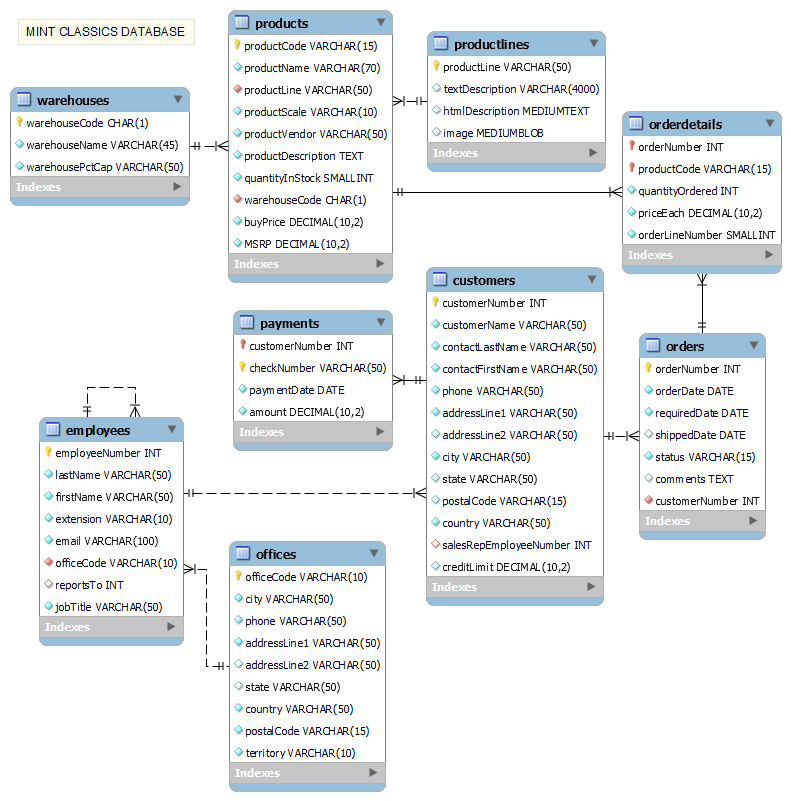

In [12]:
-- DROP VIEW mintclassics.temp1

--Joining all relevant tables and save it in a view
CREATE VIEW mintclassics.temp1 AS
SELECT
    --orders table--
    a.orderDate,
    a.requiredDate,
    a.shippedDate,

    --orderdetails--
    b.quantityOrdered,

    --products--
    c.productLine,

    --warehouses--
    d.warehouseName,

    --officecode--
    g.officeCode,

    --payments--
    h.amount

FROM mintclassics.orders AS a
JOIN mintclassics.orderdetails AS b ON a.orderNumber = b.orderNumber
JOIN mintclassics.products AS c ON b.productCode = c.productCode
JOIN mintclassics.warehouses AS d ON c.warehouseCode = d.warehouseCode

JOIN mintclassics.customers AS e ON a.customerNumber = e.customerNumber
JOIN mintclassics.employees AS f ON e.salesRepEmployeeNumber = f.employeeNumber
JOIN mintclassics.offices AS g ON f.officeCode = g.officeCode

JOIN mintclassics.payments AS h on e.customerNumber = h.customerNumber

Commands completed successfully

Total execution time: 00:00:00.068

In [13]:
SELECT * FROM mintclassics.temp1
LIMIT 10

(10 row(s) affected)

Total execution time: 00:00:01.021

orderDate,requiredDate,shippedDate,quantityOrdered,productLine,warehouseName,officeCode,amount
2003-01-06,2003-01-13,2003-01-10,30,Vintage Cars,West,2,50799.69
2003-01-06,2003-01-13,2003-01-10,50,Vintage Cars,West,2,50799.69
2003-01-06,2003-01-13,2003-01-10,22,Vintage Cars,West,2,50799.69
2003-01-06,2003-01-13,2003-01-10,49,Vintage Cars,West,2,50799.69
2003-01-06,2003-01-13,2003-01-10,30,Vintage Cars,West,2,10223.83
2003-01-06,2003-01-13,2003-01-10,50,Vintage Cars,West,2,10223.83
2003-01-06,2003-01-13,2003-01-10,22,Vintage Cars,West,2,10223.83
2003-01-06,2003-01-13,2003-01-10,49,Vintage Cars,West,2,10223.83
2003-01-06,2003-01-13,2003-01-10,30,Vintage Cars,West,2,55425.77
2003-01-06,2003-01-13,2003-01-10,50,Vintage Cars,West,2,55425.77


## Offices and Warehouses

Now let's identify and quantify which offices transact with which warehouses. Based on the series of queries below, it was found that `officeCode 4` has the most number of transactions and payments made.

Focusing on our candidate south warehouse, its top transacting offices were `officeCode 4,` and `officeCode 1,` respectively. Closing this warehouse without properly reallocating stocks might impact the sales made from these offices. To deal with this, let's explore the line of products purchased in each office. We'll do that in the next section.

In [31]:
-- DROP VIEW mintclassics.temp2

--Cross tabulating the number of orders between offices and warehouses and save it in a view
CREATE VIEW mintclassics.temp2 AS
SELECT
    officeCode,
    CASE
        WHEN officeCode = 1 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=1)
        WHEN officeCode = 2 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=2)
        WHEN officeCode = 3 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=3)
        WHEN officeCode = 4 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=4)
        WHEN officeCode = 5 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=5)
        WHEN officeCode = 6 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=6)
        WHEN officeCode = 7 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=7)
    END
    AS east,
    
    CASE
        WHEN officeCode = 1 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=1)
        WHEN officeCode = 2 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=2)
        WHEN officeCode = 3 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=3)
        WHEN officeCode = 4 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=4)
        WHEN officeCode = 5 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=5)
        WHEN officeCode = 6 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=6)
        WHEN officeCode = 7 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=7)
    END
    AS north,

    CASE
        WHEN officeCode = 1 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=1)
        WHEN officeCode = 2 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=2)
        WHEN officeCode = 3 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=3)
        WHEN officeCode = 4 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=4)
        WHEN officeCode = 5 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=5)
        WHEN officeCode = 6 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=6)
        WHEN officeCode = 7 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=7)
    END
    AS south,

    CASE
        WHEN officeCode = 1 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=1)
        WHEN officeCode = 2 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=2)
        WHEN officeCode = 3 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=3)
        WHEN officeCode = 4 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=4)
        WHEN officeCode = 5 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=5)
        WHEN officeCode = 6 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=6)
        WHEN officeCode = 7 THEN (SELECT SUM(quantityOrdered) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=7)
    END
    AS west
    
FROM mintclassics.temp1
GROUP BY officeCode
ORDER BY officeCode

Commands completed successfully

Total execution time: 00:00:00.011

In [32]:
SELECT * FROM mintclassics.temp2

(7 row(s) affected)

Total execution time: 00:00:01.190

officeCode,east,north,south,west
1,26689,10360,19296,22466
2,7906,5180,5285,5578
3,12994,9106,8079,4403
4,73092,37356,44613,35352
5,4600,4475,4488,1996
6,13186,10333,6276,11162
7,15520,7751,9930,7473


In [34]:
-- DROP VIEW mintclassics.temp3

--Cross tabulating the amount of payments between offices and warehouses and save it in a view
CREATE VIEW mintclassics.temp3 AS
SELECT
    officeCode,

    CASE
        WHEN officeCode = 1 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=1)
        WHEN officeCode = 2 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=2)
        WHEN officeCode = 3 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=3)
        WHEN officeCode = 4 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=4)
        WHEN officeCode = 5 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=5)
        WHEN officeCode = 6 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=6)
        WHEN officeCode = 7 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='east' AND officeCode=7)
    END
    AS east,

    CASE
        WHEN officeCode = 1 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=1)
        WHEN officeCode = 2 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=2)
        WHEN officeCode = 3 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=3)
        WHEN officeCode = 4 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=4)
        WHEN officeCode = 5 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=5)
        WHEN officeCode = 6 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=6)
        WHEN officeCode = 7 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='north' AND officeCode=7)
    END
    AS north,

    CASE
        WHEN officeCode = 1 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=1)
        WHEN officeCode = 2 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=2)
        WHEN officeCode = 3 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=3)
        WHEN officeCode = 4 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=4)
        WHEN officeCode = 5 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=5)
        WHEN officeCode = 6 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=6)
        WHEN officeCode = 7 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='south' AND officeCode=7)
    END
    AS south,

    CASE
        WHEN officeCode = 1 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=1)
        WHEN officeCode = 2 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=2)
        WHEN officeCode = 3 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=3)
        WHEN officeCode = 4 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=4)
        WHEN officeCode = 5 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=5)
        WHEN officeCode = 6 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=6)
        WHEN officeCode = 7 THEN (SELECT SUM(amount) FROM mintclassics.temp1 WHERE warehouseName='west' AND officeCode=7)
    END
    AS west
    
FROM mintclassics.temp1
GROUP BY officeCode
ORDER BY officeCode

Commands completed successfully

Total execution time: 00:00:00.011

In [36]:
SELECT * FROM mintclassics.temp3

(7 row(s) affected)

Total execution time: 00:00:01.190

officeCode,east,north,south,west
1,44676672.61,13100742.58,34041366.96,35059447.26
2,7551984.90,4638773.24,5044940.46,4485375.79
3,12751598.71,7318806.11,7469192.01,3723270.71
4,96979276.50,44912434.53,58891388.87,48059923.15
5,4508182.72,3788026.50,4024256.87,2024980.40
6,13437304.11,11264915.46,6404807.16,11017200.64
7,15810265.93,7428710.17,8591430.50,7670640.17


## Exploring the Product Lines

Now, let's check the products purchased at each office. Based on the results of the below query, it can be seen that the most expensive products purchased in each office were `Ships`, `Truck and Buses`, and `Trains`. All of these products were currently stored in the south warehouse.

If we were to move these three products, should we move them to the east warehouse as suggested in the previous [notebook](.\01%20%20-%20Current%20Inventory.ipynb)? To answer these questions, in the next section, let's explore which offices are receiving large orders of ships, trucks, buses, and trains. Then, we will check which warehouse those offices use the most.

In [53]:
SELECT
    officeCode,
    warehouseName,
    SUM(amount) / SUM(quantityOrdered) AS pricePerUnit,
    productLine,
    SUM(amount),
    SUM(quantityOrdered)
FROM mintclassics.temp1
GROUP BY officeCode, warehouseName, productLine
ORDER BY officeCode, warehouseName, pricePerUnit, productLine

(49 row(s) affected)

Total execution time: 00:00:01.067

officeCode,warehouseName,pricePerUnit,productLine,SUM(amount),SUM(quantityOrdered)
1,East,1673.973270,Classic Cars,44676672.61,26689
1,North,995.314436,Planes,2847594.60,2861
1,North,1367.268700,Motorcycles,10253147.98,7499
1,South,1715.517302,Ships,6879224.38,4010
1,South,1748.047933,Trucks and Buses,22488636.66,12865
1,South,1930.403106,Trains,4673505.92,2421
1,West,1560.555829,Vintage Cars,35059447.26,22466
2,East,955.221971,Classic Cars,7551984.90,7906
2,North,789.872159,Planes,1803278.14,2283
2,North,978.769451,Motorcycles,2835495.10,2897


## Where to Put the `Ships`, `Trains`, `Truck and Buses`

Now, let's find out which offices are getting more sales on the `Ships`, `Trains`, `Truck and Buses`. Based on the below queries, aside from offices with codes `4` and `1`, the offices with codes `7`, `3`, and `6` were the top offices gaining sales from products found in the south warehouse.

The offices with codes `7`, `3`, `2`, and `5` were found to be using the east warehouse frequently.

In [59]:
SELECT
    officeCode,
    SUM(amount) AS amount
FROM mintclassics.temp1
WHERE productLine IN ('Ships', 'Trucks and Buses', 'Trains')
GROUP BY officeCode
ORDER BY amount DESC

(7 row(s) affected)

Total execution time: 00:00:01.038

officeCode,amount
4,58891388.87
1,34041366.96
7,8591430.50
3,7469192.01
6,6404807.16
2,5044940.46
5,4024256.87


In [62]:
SELECT
    warehouseName,
    SUM(quantityOrdered)
FROM mintclassics.temp1
WHERE officeCode = 7
GROUP BY officeCode, warehouseName

(4 row(s) affected)

Total execution time: 00:00:01.030

warehouseName,SUM(quantityOrdered)
East,15520
North,7751
South,9930
West,7473


In [63]:
SELECT
    warehouseName,
    SUM(quantityOrdered)
FROM mintclassics.temp1
WHERE officeCode = 3
GROUP BY officeCode, warehouseName

(4 row(s) affected)

Total execution time: 00:00:01.026

warehouseName,SUM(quantityOrdered)
East,12994
South,8079
West,4403
North,9106


In [64]:
SELECT
    warehouseName,
    SUM(quantityOrdered)
FROM mintclassics.temp1
WHERE officeCode = 6
GROUP BY officeCode, warehouseName

(4 row(s) affected)

Total execution time: 00:00:01.028

warehouseName,SUM(quantityOrdered)
North,10333
West,11162
East,13186
South,6276


In [65]:
SELECT
    warehouseName,
    SUM(quantityOrdered)
FROM mintclassics.temp1
WHERE officeCode = 2
GROUP BY officeCode, warehouseName

(4 row(s) affected)

Total execution time: 00:00:01.014

warehouseName,SUM(quantityOrdered)
East,7906
South,5285
West,5578
North,5180


In [66]:
SELECT
    warehouseName,
    SUM(quantityOrdered)
FROM mintclassics.temp1
WHERE officeCode = 5
GROUP BY officeCode, warehouseName

(4 row(s) affected)

Total execution time: 00:00:01.032

warehouseName,SUM(quantityOrdered)
East,4600
West,1996
South,4488
North,4475


## Conclusion

In this notebook, we can find several factors that might influence in reorganizing / closing of warehouses. In our case, we found that the most expensive products ordered by the customer of Mint Classics are trains, ships, trucks, and buses, all of which are stored in the south warehouse. In recommending which warehouse to move the inventory of the south warehouse, we checked which offices have the highest sales of trains, ships, trucks, and buses, and found out that they were offices with codes 7, 3, and 6. Considering other products purchased in all offices, we also found that the east warehouse was the most frequently transacted. The results found in this notebook further support the results from the [previous notebook](.\01%20-%20Current%20Inventory.ipynb).